In [1]:
import matplotlib.pyplot as plt
from IPython.display import Math, display
import numpy as np
import sympy as sp
from scipy import constants as const
from tqdm import tqdm

#add relative path to backend
import sys
sys.path.append('../../clean_diag/backend')

import trap_units as si
from twod_trap import PancakeTrap

from spilling_helpers import *

# Do power and gradient sweeps at different total gradients (determines power) for 1064nm

In [2]:
initial_power = 100 * si.uW 
initial_grad = -2.5 * si.G/si.cm

trap: PancakeTrap = PancakeTrap(
    power=0,  # Set pancake laser power to 0, no 2D trap
    grad_z= initial_grad,
    grad_r=0,
    power_tweezer= initial_power,
    waist_tweezer= 2.16 * si.um,

    m= 161 * const.value("atomic mass constant"),
    mu_b= 9.93 * const.value("Bohr magneton" ),
    a=184.4*(4 * np.pi * const.epsilon_0 * const.value("Bohr radius")**3)/(2 * const.epsilon_0 * const.c),

    wvl = 1064 * si.nm,
)
axial_width = trap.get_tweezer_rayleigh()
zr = float(trap.subs(trap.get_tweezer_rayleigh()))

x, y, z = trap.x, trap.y, trap.z

print(f"{float(trap.subs(trap.get_omega_ax_tweezer()))/2/np.pi:.3f} Hz")
print(f"{trap.subs(trap.a *2*trap.power_tweezer/(np.pi*trap.waist_tweezer**2)/ const.k) /si.uK} uK")

aspect_ratio = trap.get_omega_r_tweezer() / trap.get_omega_ax_tweezer()
_aspect_ratio_latex = sp.latex(trap.omega_r_tweezer / trap.omega_ax_tweezer)
display(Math(f"{_aspect_ratio_latex} \\approx {trap.subs(aspect_ratio).evalf():.2f}"))

88.334 Hz
0.565995292411779 uK


<IPython.core.display.Math object>

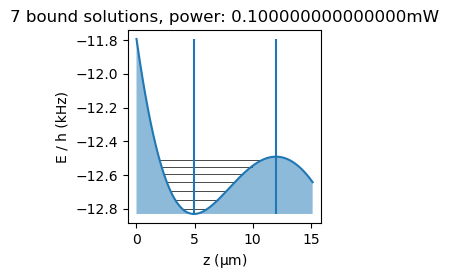

In [3]:
plot_solutions(trap,150,-0.*zr,1.1*zr,n_pot_steps=200,display_plot=-2,state_mult=1e3)

Find appropriate step sizes for the spilling sweep:

0.833333333333353

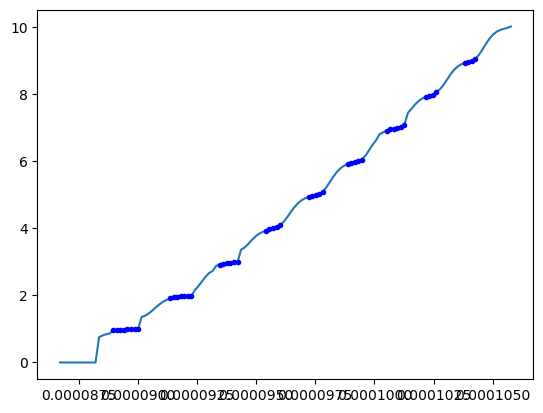

In [4]:
powers, atom_number = sweep_power_old(trap, -2.5*si.G/si.cm, 0.15*si.uW, 100, -0.*zr, 1.1*zr,max_spill_steps=200)
calculate_stepsize(powers,atom_number,plot=True)/si.uW

6.649999999999968

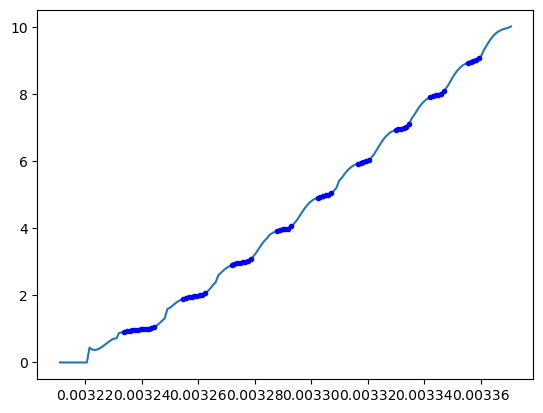

In [5]:
powers, atom_number = sweep_power_old(trap, 10*si.G/si.cm, 0.95*si.uW, 100, -0.*zr, 1.1*zr,max_spill_steps=200)
calculate_stepsize(powers,atom_number,plot=True)/si.uW

0.0028444444444444433

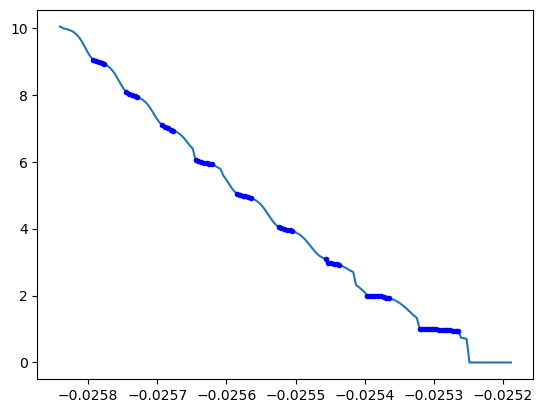

In [6]:
gradients, atom_number = sweep_gradient_old(trap, 82*si.uW, 0.0004*si.G/si.cm, 50, -0.0*zr, 1.1*zr,max_spill_steps=200)
calculate_stepsize(gradients,atom_number,plot=True)/si.G*si.cm

0.01972222222222223

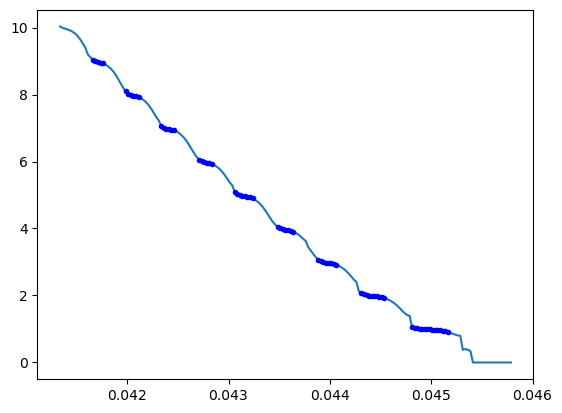

In [7]:
gradients, atom_number = sweep_gradient_old(trap, 1856*si.uW, 0.0025*si.G/si.cm, 50, -0.0*zr, 1.1*zr,max_spill_steps=200)
calculate_stepsize(gradients,atom_number,plot=True)/si.G*si.cm

Now do this for different gradients:

  4%|▍         | 1/25 [06:56<2:46:45, 416.88s/it]

For -2.5G/cm (86.71679644756973uW): dB'=0.0029777777777777728G/cm (rel: 0.11911111111111092%), dP = 0.833333333333353uW (rel: 0.9609826094500605%)
10 atoms not reached


  8%|▊         | 2/25 [15:11<2:57:15, 462.41s/it]

For -1.9791666666666665G/cm (216.8965165880169uW): dB'=0.00511875G/cm (rel: 0.25863157894736843%), dP = 1.40555555555552uW (rel: 0.6480304883020764%)
10 atoms not reached


 12%|█▏        | 3/25 [23:32<2:56:03, 480.16s/it]

For -1.4583333333333335G/cm (347.0762367284639uW): dB'=0.0077625000000000124G/cm (rel: 0.5322857142857151%), dP = 1.8777777777778992uW (rel: 0.5410274686270107%)
10 atoms not reached


 16%|█▌        | 4/25 [31:40<2:49:11, 483.43s/it]

10 atoms not reached
For -0.9374999999999999G/cm (477.25595686891097uW): dB'=0.008943749999999999G/cm (rel: 0.954%), dP = 2.3333333333331447uW (rel: 0.48890606806486586%)
10 atoms not reached


 20%|██        | 5/25 [39:48<2:41:35, 484.77s/it]

10 atoms not reached
For -0.4166666666666665G/cm (607.4356770093582uW): dB'=0.009750000000000003G/cm (rel: 2.3400000000000016%), dP = 2.6129629629634374uW (rel: 0.4301629064377761%)
10 atoms not reached


 24%|██▍       | 6/25 [47:44<2:32:36, 481.91s/it]

10 atoms not reached
For 0.10416666666666696G/cm (737.6153971498052uW): dB'=0.011166666666666667G/cm (rel: 10.719999999999969%), dP = 2.8499999999996564uW (rel: 0.38638022077796175%)
10 atoms not reached


 28%|██▊       | 7/25 [55:32<2:23:11, 477.32s/it]

10 atoms not reached
For 0.625G/cm (867.7951172902524uW): dB'=0.012025000000000004G/cm (rel: 1.9240000000000004%), dP = 3.227777777777597uW (rel: 0.3719515947331608%)
10 atoms not reached


 32%|███▏      | 8/25 [1:03:22<2:14:35, 475.04s/it]

10 atoms not reached
For 1.1458333333333337G/cm (997.9748374306995uW): dB'=0.012487499999999997G/cm (rel: 1.0898181818181811%), dP = 3.322222222221979uW (rel: 0.33289639153378736%)
10 atoms not reached


 36%|███▌      | 9/25 [1:11:31<2:07:53, 479.57s/it]

10 atoms not reached
For 1.666666666666667G/cm (1128.1545575711466uW): dB'=0.014300000000000002G/cm (rel: 0.8580000000000001%), dP = 3.657407407406624uW (rel: 0.3241938245838245%)
10 atoms not reached


 40%|████      | 10/25 [1:19:39<2:00:29, 481.95s/it]

10 atoms not reached
For 2.1874999999999996G/cm (1258.3342777115936uW): dB'=0.01622916666666666G/cm (rel: 0.7419047619047616%), dP = 3.8499999999993917uW (rel: 0.3059600352778278%)
10 atoms not reached


 44%|████▍     | 11/25 [1:27:37<1:52:12, 480.87s/it]

10 atoms not reached
For 2.708333333333334G/cm (1388.5139978520408uW): dB'=0.017425000000000003G/cm (rel: 0.6433846153846153%), dP = 4.1351851851847385uW (rel: 0.2978137196730934%)
10 atoms not reached


 48%|████▊     | 12/25 [1:35:25<1:43:20, 476.99s/it]

For 3.229166666666667G/cm (1518.693717992488uW): dB'=0.018166666666666654G/cm (rel: 0.5625806451612899%), dP = 4.362962962962699uW (rel: 0.2872839277118996%)
10 atoms not reached


 52%|█████▏    | 13/25 [1:43:29<1:35:49, 479.09s/it]

For 3.7499999999999996G/cm (1648.873438132935uW): dB'=0.02054166666666666G/cm (rel: 0.5477777777777776%), dP = 4.644444444444318uW (rel: 0.2816737984270855%)
10 atoms not reached


 56%|█████▌    | 14/25 [1:50:58<1:26:10, 470.00s/it]

For 4.270833333333334G/cm (1779.0531582733822uW): dB'=0.019475000000000006G/cm (rel: 0.45600000000000007%), dP = 4.731481481481505uW (rel: 0.26595503678336024%)
10 atoms not reached


 60%|██████    | 15/25 [1:58:37<1:17:45, 466.55s/it]

For 4.791666666666667G/cm (1909.232878413829uW): dB'=0.021666666666666685G/cm (rel: 0.4521739130434786%), dP = 5.001851851852045uW (rel: 0.26198228138662333%)
10 atoms not reached


 64%|██████▍   | 16/25 [2:06:12<1:09:29, 463.30s/it]

For 5.312500000000001G/cm (2039.4125985542767uW): dB'=0.021691666666666647G/cm (rel: 0.4083137254901956%), dP = 5.41666666666704uW (rel: 0.26559935299541015%)
10 atoms not reached


 68%|██████▊   | 17/25 [2:13:50<1:01:33, 461.70s/it]

For 5.833333333333334G/cm (2169.592318694723uW): dB'=0.023399999999999994G/cm (rel: 0.401142857142857%), dP = 5.542592592591355uW (rel: 0.25546700847124615%)
10 atoms not reached


 72%|███████▏  | 18/25 [2:21:26<53:39, 459.88s/it]  

For 6.354166666666668G/cm (2299.7720388351704uW): dB'=0.020492857142857143G/cm (rel: 0.32251053864168616%), dP = 5.812962962963657uW (rel: 0.2527625723246862%)
10 atoms not reached


 76%|███████▌  | 19/25 [2:29:06<45:58, 459.79s/it]

For 6.875G/cm (2429.951758975618uW): dB'=0.022007142857142826G/cm (rel: 0.32010389610389567%), dP = 5.749999999999098uW (rel: 0.23663021205092136%)
10 atoms not reached


 80%|████████  | 20/25 [2:36:37<38:06, 457.36s/it]

For 7.395833333333333G/cm (2560.131479116065uW): dB'=0.02386607142857145G/cm (rel: 0.3226961770623745%), dP = 6.005555555556445uW (rel: 0.2345799660894752%)
10 atoms not reached


 84%|████████▍ | 21/25 [2:44:11<30:25, 456.25s/it]

For 7.916666666666669G/cm (2690.311199256512uW): dB'=0.02549285714285713G/cm (rel: 0.3220150375939847%), dP = 6.079629629629038uW (rel: 0.2259823930892898%)
10 atoms not reached


 88%|████████▊ | 22/25 [2:51:40<22:42, 454.06s/it]

For 8.437499999999998G/cm (2820.4909193969584uW): dB'=0.02237500000000003G/cm (rel: 0.2651851851851856%), dP = 6.233333333334447uW (rel: 0.2210017160653429%)
10 atoms not reached


 92%|█████████▏| 23/25 [2:59:12<15:06, 453.40s/it]

For 8.958333333333336G/cm (2950.6706395374063uW): dB'=0.027235714285714294G/cm (rel: 0.30402657807308975%), dP = 6.575925925925594uW (rel: 0.2228620788037712%)
10 atoms not reached


 96%|█████████▌| 24/25 [3:06:39<07:31, 451.38s/it]

For 9.479166666666668G/cm (3080.8503596778532uW): dB'=0.025848214285714266G/cm (rel: 0.2726844583987439%), dP = 6.416666666667997uW (rel: 0.2082758302918338%)
10 atoms not reached


100%|██████████| 25/25 [3:14:09<00:00, 465.98s/it]

For 10.0G/cm (3211.0300798183uW): dB'=0.027857142857142875G/cm (rel: 0.2785714285714287%), dP = 6.649999999999968uW (rel: 0.20709865166931937%)


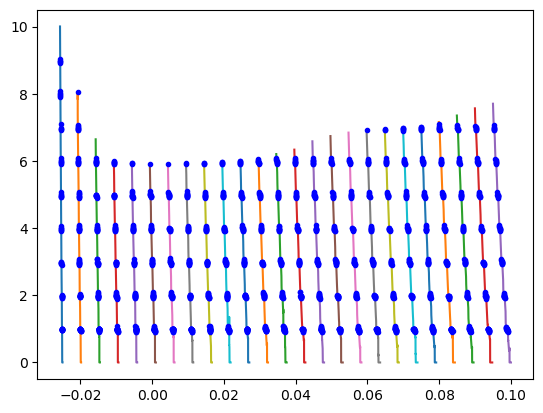

In [8]:
max_spill_steps = 200

#range for gradients to do scans at
many_grad = np.linspace(-2.5,10,25)*si.G/si.cm

#step sizes that were found in previous step
dp = np.linspace(0.15,0.95,len(many_grad))*si.uW
dgrad = np.linspace(0.0004,0.0025,len(many_grad))*si.G/si.cm

many_power = np.zeros_like(many_grad)
step_grad = np.zeros_like(many_grad)
step_power = np.zeros_like(many_grad)

data = {"gradient":np.zeros_like(many_grad),
       "power":np.zeros_like(many_grad),
       "gradient_step":np.zeros_like(many_grad),
       "power_step":np.zeros_like(many_grad),
       "gradient_rel":np.zeros_like(many_grad),
       "power_rel":np.zeros_like(many_grad)
       }

for i, initial_grad in tqdm(enumerate(many_grad),total=len(many_grad)):
    #print(i)
    many_power[i] = 4/3/np.sqrt(3)*zr * np.pi* trap.subs(trap.m * trap.g + trap.mu_b * initial_grad) * trap.subs(trap.waist_tweezer**2/trap.a)

    gradients, atom_number = sweep_gradient_old(trap, many_power[i], dgrad[i], 250, -0.*zr, 1.1*zr,max_spill_steps=max_spill_steps)
    step_grad[i] = calculate_stepsize(gradients,atom_number,plot=True)

    powers, atom_number = sweep_power_old(trap, initial_grad, dp[i], 250, -0.*zr, 1.1*zr,max_spill_steps=max_spill_steps)
    step_power[i] = calculate_stepsize(powers,atom_number)

    print(f"For {initial_grad/si.G*si.cm}G/cm ({many_power[i]/si.uW}uW): dB'={step_grad[i]/si.G*si.cm}G/cm (rel: {step_grad[i]/np.abs(initial_grad)*100}%), dP = {step_power[i]/si.uW}uW (rel: {step_power[i]/many_power[i]*100}%)")

    data["gradient"][i] = initial_grad
    data["power"][i] = many_power[i]
    data["gradient_step"][i] = step_grad[i]
    data["gradient_rel"][i] = step_grad[i]/np.abs(initial_grad)
    data["power_step"][i] = step_power[i]
    data["power_rel"][i] = step_power[i]/many_power[i]


# Save dictionary to numpy file
np.savez("data/sweeps_1064.npz",gradient=data["gradient"], power = data["power"],gradient_step = data["gradient_step"],gradient_rel = data["gradient_rel"],power_step = data["power_step"],power_rel = data["power_rel"])

# Repeat with 532nm and 1.1um

In [9]:
initial_power = 15 * si.uW 
initial_grad = -2.5 * si.G/si.cm

trap: PancakeTrap = PancakeTrap(
    power=0,  # Set pancake laser power to 0, no 2D trap
    grad_z= initial_grad,
    grad_r=0,
    power_tweezer= initial_power,
    waist_tweezer= 1.08 * si.um,

    m= 161 * const.value("atomic mass constant"),
    mu_b= 9.93 * const.value("Bohr magneton" ),
    a=180*(4 * np.pi * const.epsilon_0 * const.value("Bohr radius")**3)/(2 * const.epsilon_0 * const.c),

    wvl = 532 * si.nm,
)
axial_width = trap.get_tweezer_rayleigh()
zr = float(trap.subs(trap.get_tweezer_rayleigh()))

x, y, z = trap.x, trap.y, trap.z

print(f"{float(trap.subs(trap.get_omega_ax_tweezer()))/2/np.pi:.3f} Hz")
print(f"{trap.subs(trap.a *2*trap.power_tweezer/(np.pi*trap.waist_tweezer**2)/ const.k) /si.uK} uK")

aspect_ratio = trap.get_omega_r_tweezer() / trap.get_omega_ax_tweezer()
_aspect_ratio_latex = sp.latex(trap.omega_r_tweezer / trap.omega_ax_tweezer)
display(Math(f"{_aspect_ratio_latex} \\approx {trap.subs(aspect_ratio).evalf():.2f}"))

135.205 Hz
0.331493989048114 uK


<IPython.core.display.Math object>

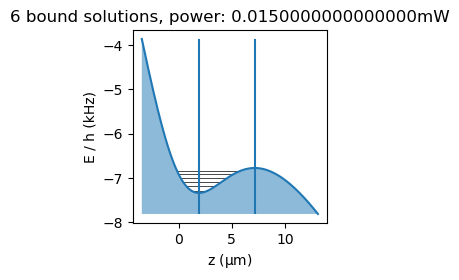

In [10]:
plot_solutions(trap,150,-0.5*zr,1.9*zr,n_pot_steps=200,display_plot=-2,state_mult=1e3)

Find appropriate step sizes for the spilling sweep:

0.31666666666666704

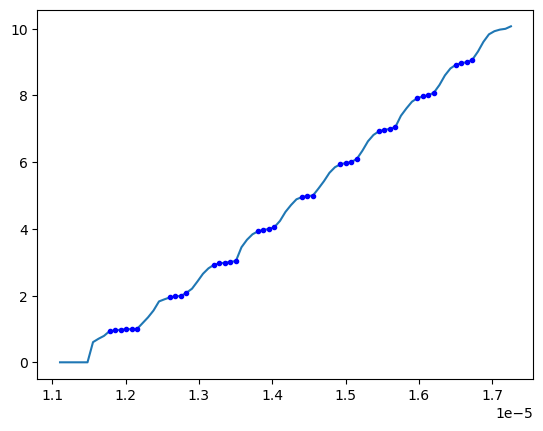

In [11]:
powers, atom_number = sweep_power_old(trap, -2.5*si.G/si.cm, 0.075*si.uW, 100, -0.5*zr, 1.9*zr,max_spill_steps=200)
calculate_stepsize(powers,atom_number,plot=True)/si.uW

2.1388888888888378

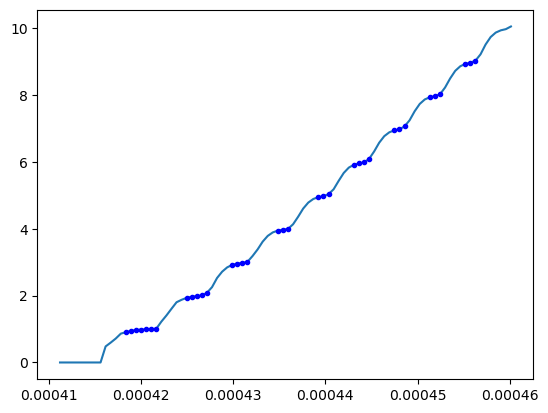

In [12]:
powers, atom_number = sweep_power_old(trap, 10*si.G/si.cm, 0.55*si.uW, 100, -0.5*zr, 1.9*zr,max_spill_steps=200)
calculate_stepsize(powers,atom_number,plot=True)/si.uW

0.007333333333333339

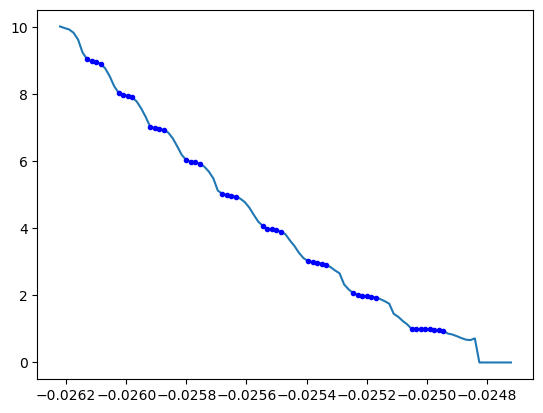

In [13]:
gradients, atom_number = sweep_gradient_old(trap, 12*si.uW, 0.0015*si.G/si.cm, 50, -0.5*zr, 1.9*zr,max_spill_steps=200)
calculate_stepsize(gradients,atom_number,plot=True)/si.G*si.cm

0.047777777777777794

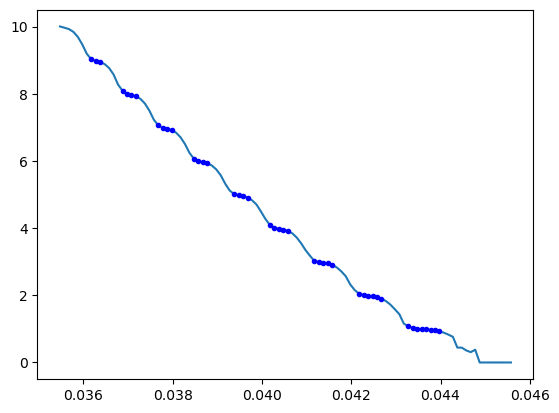

In [14]:
gradients, atom_number = sweep_gradient_old(trap, 237*si.uW, 0.01*si.G/si.cm, 50, -0.5*zr, 1.9*zr,max_spill_steps=200)
calculate_stepsize(gradients,atom_number,plot=True)/si.G*si.cm

Now do this for different gradients:

  4%|▍         | 1/25 [03:55<1:34:14, 235.60s/it]

For -2.5G/cm (11.10456754509157uW): dB'=0.007333333333333329G/cm (rel: 0.29333333333333317%), dP = 0.31666666666666704uW (rel: 2.8516794137259294%)


  8%|▊         | 2/25 [09:26<1:51:42, 291.40s/it]

For -1.9791666666666665G/cm (27.774803929743275uW): dB'=0.011743055555555548G/cm (rel: 0.593333333333333%), dP = 0.48449074074073856uW (rel: 1.744353414577702%)


 12%|█▏        | 3/25 [15:34<1:59:48, 326.73s/it]

For -1.4583333333333335G/cm (44.445040314394966uW): dB'=0.01643981481481481G/cm (rel: 1.127301587301587%), dP = 0.649305555555539uW (rel: 1.460917913365556%)


 16%|█▌        | 4/25 [22:00<2:02:30, 350.02s/it]

For -0.9374999999999999G/cm (61.11527669904665uW): dB'=0.01964583333333333G/cm (rel: 2.0955555555555554%), dP = 0.7166666666666758uW (rel: 1.1726473401990753%)


 20%|██        | 5/25 [28:31<2:01:36, 364.81s/it]

For -0.4166666666666665G/cm (77.78551308369836uW): dB'=0.02300925925925926G/cm (rel: 5.522222222222225%), dP = 0.8736111111111415uW (rel: 1.1231025887444144%)


 24%|██▍       | 6/25 [35:01<1:58:10, 373.18s/it]

For 0.10416666666666696G/cm (94.45574946835006uW): dB'=0.025803240740740745G/cm (rel: 24.771111111111043%), dP = 0.9084490740740576uW (rel: 0.9617721305344763%)


 28%|██▊       | 7/25 [41:27<1:53:18, 377.67s/it]

For 0.625G/cm (111.12598585300177uW): dB'=0.02738888888888889G/cm (rel: 4.3822222222222225%), dP = 1.0333333333333414uW (rel: 0.9298755150755126%)


 32%|███▏      | 8/25 [47:51<1:47:31, 379.50s/it]

For 1.1458333333333337G/cm (127.79622223765345uW): dB'=0.031833333333333345G/cm (rel: 2.7781818181818183%), dP = 1.0439814814815127uW (rel: 0.8169110660721217%)


 36%|███▌      | 9/25 [54:12<1:41:22, 380.17s/it]

For 1.666666666666667G/cm (144.46645862230514uW): dB'=0.033703703703703694G/cm (rel: 2.0222222222222213%), dP = 1.2444444444444258uW (rel: 0.8614071780481007%)


 40%|████      | 10/25 [1:00:30<1:34:50, 379.35s/it]

For 2.1874999999999996G/cm (161.13669500695687uW): dB'=0.03541666666666667G/cm (rel: 1.6190476190476195%), dP = 1.2656249999999725uW (rel: 0.7854356203255445%)


 44%|████▍     | 11/25 [1:06:38<1:27:41, 375.83s/it]

For 2.708333333333334G/cm (177.80693139160857uW): dB'=0.038652777777777765G/cm (rel: 1.4271794871794865%), dP = 1.2736111111111326uW (rel: 0.716288786462483%)


 48%|████▊     | 12/25 [1:12:45<1:20:51, 373.19s/it]

For 3.229166666666667G/cm (194.47716777626027uW): dB'=0.040768518518518516G/cm (rel: 1.2625089605734765%), dP = 1.4310185185185uW (rel: 0.7358285473207019%)


 52%|█████▏    | 13/25 [1:18:53<1:14:20, 371.70s/it]

For 3.7499999999999996G/cm (211.14740416091195uW): dB'=0.0408888888888889G/cm (rel: 1.0903703703703707%), dP = 1.4930555555554925uW (rel: 0.7071152787735242%)


 56%|█████▌    | 14/25 [1:25:04<1:08:06, 371.48s/it]

For 4.270833333333334G/cm (227.81764054556368uW): dB'=0.04544212962962964G/cm (rel: 1.0640108401084012%), dP = 1.6245370370370633uW (rel: 0.7130865867747211%)


 60%|██████    | 15/25 [1:31:09<1:01:33, 369.35s/it]

For 4.791666666666667G/cm (244.48787693021535uW): dB'=0.04664351851851853G/cm (rel: 0.9734299516908215%), dP = 1.5648148148147945uW (rel: 0.6400377942917156%)


 64%|██████▍   | 16/25 [1:37:14<55:13, 368.20s/it]  

For 5.312500000000001G/cm (261.1581133148671uW): dB'=0.046173611111111124G/cm (rel: 0.8691503267973858%), dP = 1.6114583333333747uW (rel: 0.6170431823385508%)


 68%|██████▊   | 17/25 [1:43:17<48:53, 366.66s/it]

For 5.833333333333334G/cm (277.82834969951875uW): dB'=0.04586666666666669G/cm (rel: 0.7862857142857146%), dP = 1.7407407407407636uW (rel: 0.6265525971785949%)


 72%|███████▏  | 18/25 [1:49:18<42:35, 365.02s/it]

For 6.354166666666668G/cm (294.4985860841704uW): dB'=0.051810185185185216G/cm (rel: 0.8153734061930786%), dP = 1.7372685185185037uW (rel: 0.589907252737022%)


 76%|███████▌  | 19/25 [1:54:57<35:43, 357.19s/it]

For 6.875G/cm (311.16882246882216uW): dB'=0.05425G/cm (rel: 0.7890909090909091%), dP = 1.7729166666666083uW (rel: 0.5697603804263673%)


 80%|████████  | 20/25 [2:00:29<29:07, 349.55s/it]

For 7.395833333333333G/cm (327.8390588534739uW): dB'=0.0548611111111111G/cm (rel: 0.7417840375586854%), dP = 1.9043981481480703uW (rel: 0.5808942213317029%)


 84%|████████▍ | 21/25 [2:05:56<22:51, 342.80s/it]

For 7.916666666666669G/cm (344.50929523812556uW): dB'=0.055314814814814844G/cm (rel: 0.6987134502923977%), dP = 1.9356481481482413uW (rel: 0.5618565812020593%)


 88%|████████▊ | 22/25 [2:11:18<16:49, 336.52s/it]

For 8.437499999999998G/cm (361.17953162277723uW): dB'=0.05859027777777778G/cm (rel: 0.6944032921810701%), dP = 2.0715277777778347uW (rel: 0.5735451752956415%)


 92%|█████████▏| 23/25 [2:16:48<11:08, 334.46s/it]

For 8.958333333333336G/cm (377.84976800742896uW): dB'=0.05987962962962963G/cm (rel: 0.6684237726098191%), dP = 1.9282407407407605uW (rel: 0.5103194189874027%)


 96%|█████████▌| 24/25 [2:22:17<05:32, 332.80s/it]

For 9.479166666666668G/cm (394.5200043920807uW): dB'=0.06216203703703703G/cm (rel: 0.6557753357753356%), dP = 2.179745370370351uW (rel: 0.5525056641244693%)


100%|██████████| 25/25 [2:27:40<00:00, 354.44s/it]

For 10.0G/cm (411.1902407767323uW): dB'=0.06555555555555558G/cm (rel: 0.6555555555555557%), dP = 2.1388888888888378uW (rel: 0.5201701491865439%)


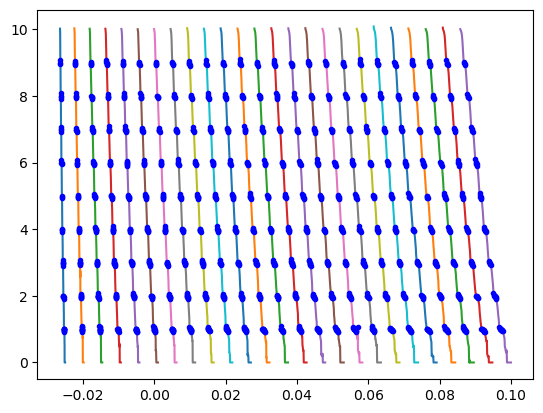

In [15]:
max_spill_steps = 200

#range for gradients to do scans at
many_grad = np.linspace(-2.5,10,25)*si.G/si.cm

#step sizes that were found in previous step
dp = np.linspace(0.075,0.55,len(many_grad))*si.uW
dgrad = np.linspace(0.0015,0.01,len(many_grad))*si.G/si.cm

many_power = np.zeros_like(many_grad)
step_grad = np.zeros_like(many_grad)
step_power = np.zeros_like(many_grad)

data = {"gradient":np.zeros_like(many_grad),
       "power":np.zeros_like(many_grad),
       "gradient_step":np.zeros_like(many_grad),
       "power_step":np.zeros_like(many_grad),
       "gradient_rel":np.zeros_like(many_grad),
       "power_rel":np.zeros_like(many_grad)
       }

for i, initial_grad in tqdm(enumerate(many_grad),total=len(many_grad)):
    #print(i)
    many_power[i] = 4/3/np.sqrt(3)*zr * np.pi* trap.subs(trap.m * trap.g + trap.mu_b * initial_grad) * trap.subs(trap.waist_tweezer**2/trap.a)

    gradients, atom_number = sweep_gradient_old(trap, many_power[i], dgrad[i], 250, -0.5*zr, 1.9*zr,max_spill_steps=max_spill_steps)
    step_grad[i] = calculate_stepsize(gradients,atom_number,plot=True)

    powers, atom_number = sweep_power_old(trap, initial_grad, dp[i], 250, -0.5*zr, 1.9*zr,max_spill_steps=max_spill_steps)
    step_power[i] = calculate_stepsize(powers,atom_number)

    print(f"For {initial_grad/si.G*si.cm}G/cm ({many_power[i]/si.uW}uW): dB'={step_grad[i]/si.G*si.cm}G/cm (rel: {step_grad[i]/np.abs(initial_grad)*100}%), dP = {step_power[i]/si.uW}uW (rel: {step_power[i]/many_power[i]*100}%)")

    data["gradient"][i] = initial_grad
    data["power"][i] = many_power[i]
    data["gradient_step"][i] = step_grad[i]
    data["gradient_rel"][i] = step_grad[i]/np.abs(initial_grad)
    data["power_step"][i] = step_power[i]
    data["power_rel"][i] = step_power[i]/many_power[i]


# Save dictionary to numpy file
np.savez("data/sweeps_532.npz",gradient=data["gradient"], power = data["power"],gradient_step = data["gradient_step"],gradient_rel = data["gradient_rel"],power_step = data["power_step"],power_rel = data["power_rel"])